In [71]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation

# Use retina backend for better figures
%config InlineBackend.figure_format = 'retina'


# Partial Differential Equation

Function value depends on multiple variables.

* 2nd Order linear PDE classification: hyperbolic, parabolic, elliptic
* Characteristic line/area

# Discretization and Difference

Generate a multi-dimension grid, and calculate function values
at grid points. There are different schemes for difference calculation.  
2nd order central difference:
\begin{align}
    u_{xx} &= \frac{u_{i+1, j} - 2u_{i, j} + u_{i-1, j}}{\Delta x^2} \\
    u_{yy} &= \frac{u_{i, j+1} - 2u_{i, j} + u_{i, j-1}}{\Delta y^2} \\
    u_{x} &= \frac{u_{i+1, j} - u_{i-1, j}}{2 \Delta x} \\
    u_{y} &= \frac{u_{i+1, j} - u_{i-1, j}}{2 \Delta y} \\
\end{align}

# Solve Wave Equation

* Initial value condition 
* Reflective boundary
* Intermediate field $v(x)$

Wave equation, 
\begin{equation}
    \frac{\partial^2u}{\partial t^2} = c^2 \frac{\partial^2u}{\partial x^2}
\end{equation}

In [10]:
# Solve wave equation numerically with FTCS method
length = 1.  # Length of rope
n = 10**3 # Sample number of space position 
c = 300 # Wave velocity Unit: m/s

# In order to maintain stability of FTCS, 
# dt <= 1/2 * dx^2 / D
dt = 0.5 * dx**2 / D 
t_end = length**2 / D # Final stable solution 

x = np.linspace(0, length, n+1)
temp_now = np.zeros_like(x, dtype="float")
temp_now[[0, -1]] = 25, 0  # Initial condition 
temp_next = np.zeros_like(x, dtype="float")


def frame_iter():
    global temp_next, temp_now
    t = 0
    while t <= t_end:
        temp_next[1:-1] = temp_now[1:-1] + dt * D \
                    * (temp_now[2:] - 2 * temp_now[1:-1] + temp_now[0:-2])\
                    / dx**2 
        temp_next[[0, -1]] = 25, 0
        temp_now = temp_next
        ax.set_title(f"Time: {t:.2F}")
        line.set_data(x, temp_now)
        yield line, 
        t += dt 
        

def init():
    line.set_data(x, temp_now)
    return line,
    

In [50]:
t_end

10000.0

# Von Neumann Stability Analysis

# LEX and Leapfrog Scheme



# Heat Equation 

# FTCS

<IPython.core.display.Javascript object>


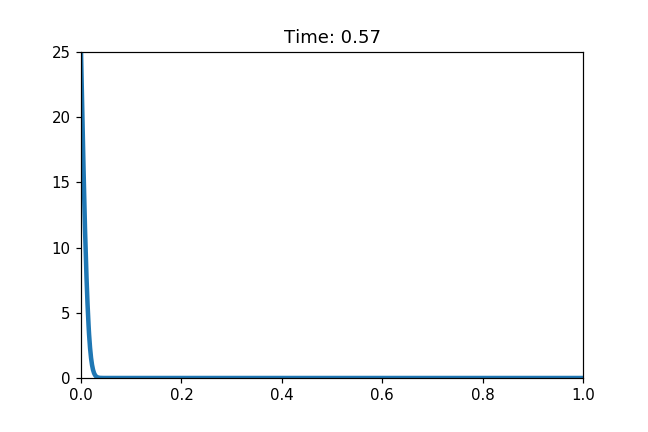

In [14]:
# Solve heat equation numerically with FTCS method
length = 1.  # Length of bar
n = 10**3
D = 1e-4
# In order to maintain stability of FTCS, 
# dt <= 1/2 * dx^2 / D
dt = 0.5 * dx**2 / D 
t_end = length**2 / D # Final stable solution 

x = np.linspace(0, length, n+1)
temp_now = np.zeros_like(x, dtype="float")
temp_now[[0, -1]] = 25, 0  # Initial condition 
temp_next = np.zeros_like(x, dtype="float")


def frame_iter():
    global temp_next, temp_now
    t = 0
    while t <= t_end:
        temp_next[1:-1] = temp_now[1:-1] + dt * D \
                    * (temp_now[2:] - 2 * temp_now[1:-1] + temp_now[0:-2])\
                    / dx**2 
        temp_next[[0, -1]] = 25, 0
        temp_now = temp_next
        ax.set_title(f"Time: {t:.2F}")
        line.set_data(x, temp_now)
        yield line, 
        t += dt 
        

def init():
    line.set_data(x, temp_now)
    return line,
    
    
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=3)
ax.set_xlim(0, length)
ax.set_ylim(0, 25)
frame = frame_iter()
update = lambda x: next(frame)
ani = animation.FuncAnimation(fig, update, init_func=init, \
                             frames=300, interval=10)


# Implicit Differencing Scheme(BTCS)

FTCS has a obvious disadvantage, dt cannot be greater than $dx^2 /2 D$, which means for the same end time, it takes more steps($N\approx (L/\Delta x)^2$ for heat equation) and time. If we replace central difference of time with forward difference, we can have a more efficient method for computing such kind of problems.
BTCS algorithm has absolute stability and it converts integration problem into dealing with a size-n linear system.  
BTCS method(Calculate $u_{xx}$ at time $t_n$ with new $u$ values at next time.):
\begin{equation}
    u_{xx}^{n} = \frac{u_{j+1}^{n+1} - u_{j}^{n+1} + u_{j-1}^{n+1}}{\Delta x^2}
\end{equation}  
Stability analysis:  
\begin{equation}
    \xi (k) = \frac{1}{1 + 4 \frac{D\Delta t}{\Delta x^2} \sin(\frac{k\Delta x}{2})}
\end{equation}
We can see no matter what $\Delta x$ and $\Delta t$ are, this method is always stable. So we can choose larger step in time.  
According to above equation, we have established recurrence relationship between $u_{n+1}$ and $u_{n}$, namely, 
\begin{equation}
    \alpha u_{j+1}^{n+1} + \beta u_{j}^{n+1} + \gamma u_{j-1}^{n+1} = u_j^{n}
\end{equation}
When updating $u_j$, we need to solve a linear system, which is the problem that we've already worked on.

<IPython.core.display.Javascript object>


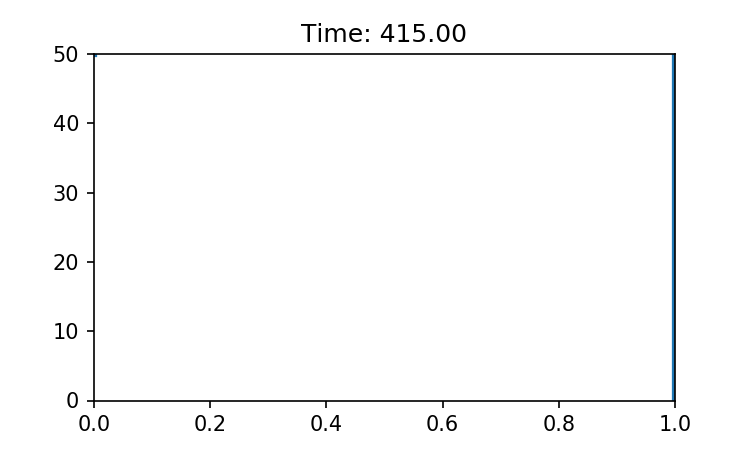

In [98]:
def gauss_solver_band(coefficient):
    """
    Solve linear system in band matrix form with Gauss method
    
    coefficient: coefficient matrix with shape(n, n+1), n equals
                 number of variables. The last column is the right 
                 side of equations.
 
    return array of solution
    """
    coefficient = coefficient.copy()
    # number of variables 
    dimension = coefficient.shape[0]
    varibles = np.zeros(dimension)

    for i in range(dimension-1):
        coefficient[i] = coefficient[i] / coefficient[i, i]
        coefficient[i+1] = coefficient[i+1] - coefficient[i+1, i] / coefficient[i, i] * coefficient[i]

    # Solve xi in reverse order 
    for i in range(-1, -dimension-1, -1):
        varibles[i] = coefficient[i, -1] - sum(coefficient[i,:-1] * varibles)
    
    return varibles


temp0, temp1 = 50, 0
length = 1. # Unit: m
D = 1e-4
dx = 1e-2
dt = 1 * dx**2 / D 
t_end = length**2 / D
x = np.arange(0, length+dx, dx)
nx = len(x)
alpha = gamma = - D * dt / dx**2
beta = 1 + 2 * D * dt / dx**2 

# Construct band matrix 
temp_prev = np.zeros_like(x, dtype="float")
temp_prev[[0, -1]] = temp0, temp1
temp_next = np.zeros_like(x, dtype="float")
boundary = np.zeros(nx-2, dtype="float")
boundary[[0, -1]] = alpha * temp0, gamma * temp1
coe = np.zeros((nx-2, nx-1), dtype="float")
coe[:, -1] = temp_prev[1:-1] - boundary
np.fill_diagonal(coe, beta)
np.fill_diagonal(coe[1:], alpha)
np.fill_diagonal(coe[:,1:], gamma)


def frame_iter():
    global temp_next, temp_prev, coefficient
    t = 0
    while t <= t_end:
        coe[:, -1] = temp_prev[1:-1] - boundary
        temp_next[1:-1] = gauss_solver_band(coe)
        temp_next[[0, -1]] = temp0, temp1
        temp_prev = temp_next
        ax.set_title(f"Time: {t:.2F}")
        line.set_data(x, temp_next)
        yield line, 
        t += dt 
        

def init():
    line.set_data(x, temp_prev)
    return line,
    

frame = frame_iter()
update = lambda x: next(frame)
    
fig, ax = plt.subplots(figsize=(5, 3))
line, = ax.plot([], [], lw=3)
ax.set_xlim(0, length)
ax.set_ylim(temp1, temp0)
ani = animation.FuncAnimation(fig, update, init_func=init, \
                             frames=300, interval=100)


<IPython.core.display.Javascript object>


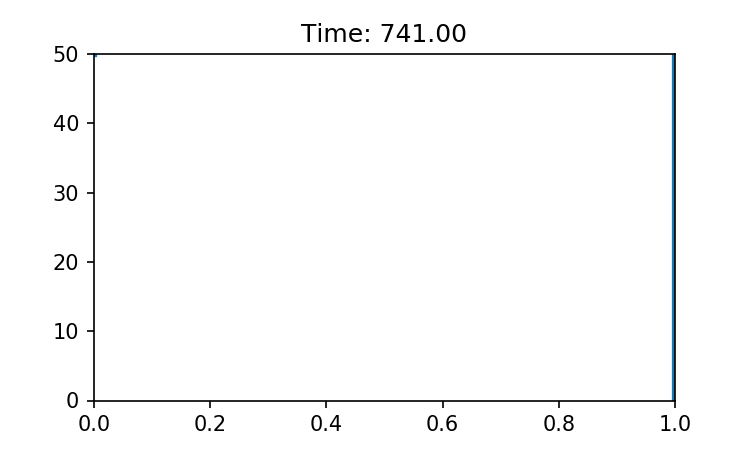